# Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Machine_Learning-USU/blob/main/Lectures%20and%20codes/Module%206-%20Penalized%20Regressions/regularization_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---

# Regularization: Penalized regression

Regularization force the learning algorithm to build a less complex model . In practice, that often leads to slightly higher bias but significantly reduces the variance. The most common penalized regression models are:

1. Ridge regression
2. Lasso regression
3. Elastic Net regression

In this notebook we will explore the three methods and compare their results with a multiple linear regression model applied to Boston Housing dataset. The target variable is **price** and the features are 13 variables listed below. 

First we need to import the libraries: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state= 1000

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/boston_clean.csv")

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.drop('B', axis=1, inplace=True)

###  Splitting the data

In [6]:
y = df['price']
X = df.drop('price', axis=1) # be careful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
300,0.04417,70.0,2.24,0.0,0.400,6.871,47.4,7.8278,5.0,358.0,14.8,6.07
32,1.38799,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,4.0,307.0,21.0,27.71
181,0.06888,0.0,2.46,0.0,0.488,6.144,62.2,2.5979,3.0,193.0,17.8,9.45
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,7.73
477,15.02340,0.0,18.10,0.0,0.614,5.304,97.3,2.1007,24.0,666.0,20.2,24.91


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

----

# A) Training the models 

In this section we will train 4 different models:
1. Linear regression (model_linear)
2. Ridge regression (model_ridge)
3. Lasso regression (model_lasso)
4. Elastic Net regression (model_net)

In [9]:
from sklearn.linear_model import LinearRegression, Ridge,RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

In [10]:
# starting with default parameters:
model_linear = LinearRegression()
model_ridge = Ridge(0)
model_lasso = Lasso(0)
model_net = ElasticNet(0)

In [11]:
y_hat_linear= model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net   = model_net.fit(X_train, y_train).predict(X_test)

In [12]:
df_predictions = pd.DataFrame({'y_test':y_test,
                               'y_hat_linear':y_hat_linear,
                               'y_hat_ridge':y_hat_ridge,
                               'y_hat_lasso':y_hat_lasso,
                               'y_hat_net':y_hat_net})
df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
483,21.8,20.805692,20.805692,20.805692,20.805692
426,10.2,19.607459,19.607459,19.607459,19.607459
22,15.2,15.233529,15.233529,15.233529,15.233529
268,43.5,39.280957,39.280957,39.280957,39.280957
371,50.0,25.109791,25.109791,25.109791,25.109791


### coefficients

In [13]:
df.drop('price', axis=1, inplace=False).columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT'],
      dtype='object')

In [14]:
coefficients = pd.DataFrame({'Features':df.drop('price', axis=1, inplace=False).columns})
coefficients['model_lin']= model_linear.coef_
coefficients['model_ridge']= model_ridge.coef_
coefficients['model_lasso']= model_lasso.coef_
coefficients['model_net']= model_net.coef_
coefficients

,Features,model_lin,model_ridge,model_lasso,model_net
0,CRIM,-1.277009,-1.277009,-1.277009,-1.277009
1,ZN,1.343597,1.343597,1.343597,1.343597
2,INDUS,-0.010820,-0.010820,-0.010820,-0.010820
3,CHAS,0.786778,0.786778,0.786778,0.786778
4,NOX,-2.577788,-2.577788,-2.577788,-2.577788
5,RM,2.289798,2.289798,2.289798,2.289798
6,AGE,0.077703,0.077703,0.077703,0.077703
7,DIS,-3.679772,-3.679772,-3.679772,-3.679772
8,RAD,2.561868,2.561868,2.561868,2.561868
9,TAX,-1.840361,-1.840361,-1.840361,-1.840361


----

### Performance in the test set

In [15]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_linear']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

5.205

In [16]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_ridge']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,5)

5.20501

In [17]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_lasso']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

5.205

In [18]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_net']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

5.205

-------------

### Plotting the regression coefficients vs alphas:

#### 1) Ridge regression coefficients vs alpha

In [19]:
alpha_ridge = 10**np.linspace(0,6,100)

In [20]:
ridge = Ridge()
coefs_ridge = []

for i in alpha_ridge:
    ridge.set_params(alpha = i)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    
np.shape(coefs_ridge)

(100, 12)

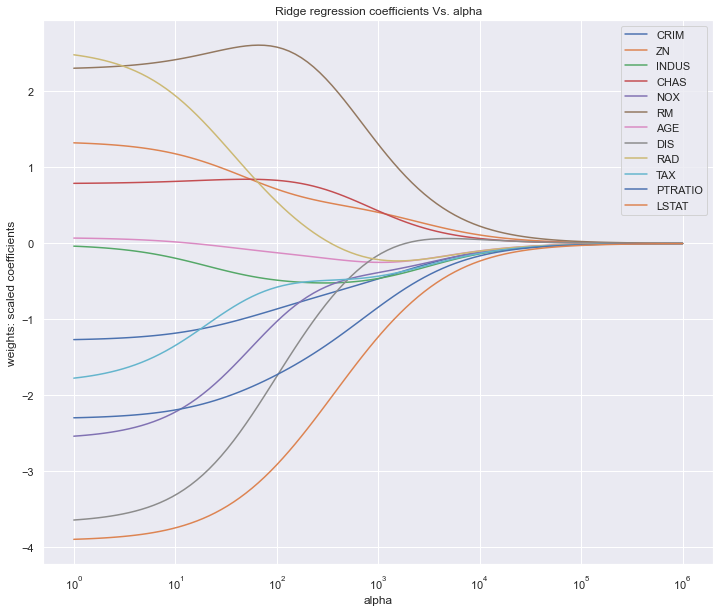

In [21]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_ridge, coefs_ridge)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Ridge regression coefficients Vs. alpha')
plt.legend(df.drop('price',axis=1, inplace=False).columns)

plt.show()

---

#### 2) Lasso regression coefficients vs alpha

In [22]:
alpha_lasso = 10**np.linspace(-3,1,100)

In [23]:
lasso = Lasso()
coefs_lasso = []

for i in alpha_lasso:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    
np.shape(coefs_lasso)

(100, 12)

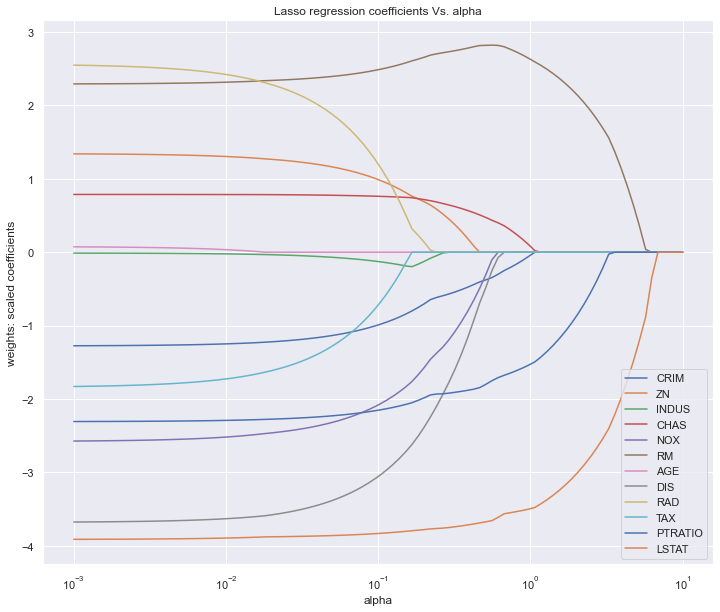

In [24]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(df.drop('price',axis=1, inplace=False).columns)

plt.show()

**Challenge**: Which coefficients survive when alpha = 1? 

---

#### 3) Elastic Net regression coefficients vs alpha

In [25]:
alpha_elasticnet = 10**np.linspace(-3,2,100)

In [26]:
elasticnet = ElasticNet()
coefs_elasticnet = []

for i in alpha_elasticnet:
    elasticnet.set_params(alpha = i)
    elasticnet.fit(X_train, y_train)
    coefs_elasticnet.append(elasticnet.coef_)
    
np.shape(coefs_elasticnet)

(100, 12)

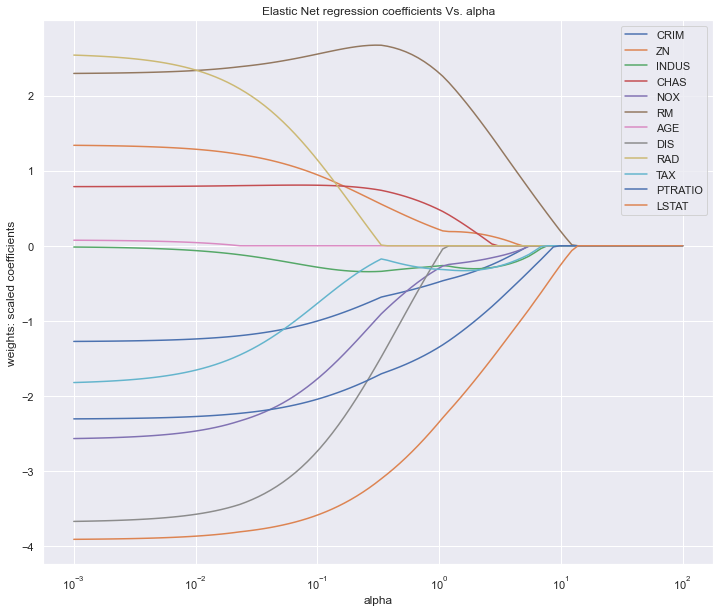

In [27]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_elasticnet, coefs_elasticnet)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Elastic Net regression coefficients Vs. alpha')
plt.legend(df.drop('price',axis=1, inplace=False).columns)

plt.show()

----

## Cross Validation 

Let's use cross validation to find the optimal Lambdas (alphas) for different models. 

#### 1) Optimal alpha for Ridge regression

In [28]:
ridgecv = RidgeCV(alphas=alpha_ridge)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

4.0370172585965545

In [29]:
alpha_ridge_opt = ridgecv.alpha_

----

#### 2) Optimal alpha for Lasso regression

In [30]:
lassocv = LassoCV(alphas=alpha_lasso)
lassocv.fit(X_train, y_train)
lassocv.alpha_

0.013530477745798075

In [31]:
alpha_lasso_opt = lassocv.alpha_

----

#### 3) Optimal alpha for Elastic Net regression

In [32]:
elasticnetcv = ElasticNetCV(alphas=alpha_elasticnet, l1_ratio=np.linspace(0.0, 1, 11))
elasticnetcv.fit(X_train, y_train)
elasticnetcv.alpha_

0.009111627561154887

In [33]:
elasticnetcv.l1_ratio_

0.7000000000000001

In [34]:
alpha_elasticnet_opt = elasticnetcv.alpha_

----

#### Refit the models!

***Exercise***: Now go back and refit the 3 models with the optimal alphas! 
- compare the RMSE_test?
- were you able to beat the linear regression model?
- what do you conclude?

----

---
---
# PyCaret

1. **PyCaret**: https://pycaret.readthedocs.io/en/latest/index.html PyCaret3.0
2. **scikit-learn**: https://scikit-learn.org/stable/index.html
3. **PyCaret model containers** : https://github.com/pycaret/pycaret/tree/master/pycaret/containers/models

# Installation

Follow the steps here: https://pycaret.gitbook.io/docs/get-started/installation


In [ ]:
#only if you want to run it in Google Colab: 
# for this chapter, we can install the light version of PyCaret as below. 

# !pip install pycaret

In [37]:
# if you got a warning that you need to "RESTART RUNTIME", go ahead and press that button. 

# let's double ckeck the Pycaret version: 
from pycaret.utils import version
version()

'3.0.0.rc4'

In [38]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [39]:
from pycaret.regression import *

In [40]:
setup(df, target='price', session_id=1000, train_size=0.8, fold_strategy='kfold', fold=5, 
      normalize=True, normalize_method='zscore')

,Description,Value
0,Session id,1000
1,Target,price
2,Target type,Regression
3,Data shape,"(506, 13)"
4,Train data shape,"(404, 13)"
5,Test data shape,"(102, 13)"
6,Numeric features,12
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [104]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


## Create and tune model

In [41]:
lr = create_model(estimator='lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3992,24.1058,4.9098,0.6593,0.2045,0.1574
1,3.6256,30.5693,5.5290,0.6963,0.2618,0.1654
2,3.1717,18.6257,4.3158,0.6910,0.2865,0.1811
3,3.3452,17.8032,4.2194,0.7514,0.2199,0.1640
4,3.9383,29.7353,5.4530,0.7364,0.2512,0.1900
Mean,3.4960,24.1679,4.8854,0.7069,0.2448,0.1716
Std,0.2644,5.3517,0.5486,0.0331,0.0294,0.0121


In [42]:
tuned_lr = tune_model(lr) # why the ouput is exactly the same as untuned model?

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:58:41
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [107]:
lasso = create_model(estimator='lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.5119,31.4823,5.6109,0.5551,0.2332,0.1601
1,4.0878,37.9269,6.1585,0.6232,0.2910,0.1927
2,3.6813,22.8768,4.7830,0.6205,0.2722,0.2154
3,3.3219,20.5123,4.5291,0.7136,0.2194,0.1715
4,4.5917,42.6236,6.5287,0.6221,0.2685,0.2115
Mean,3.8389,31.0844,5.5220,0.6269,0.2569,0.1903
Std,0.4534,8.4766,0.7692,0.0505,0.0265,0.0217


In [108]:
tuned_lasso = tune_model(lasso)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.7909,34.2521,5.8525,0.5159,0.2376,0.1778
1,4.5888,44.1103,6.6416,0.5618,0.2700,0.2225
2,3.8515,24.1991,4.9193,0.5986,0.2493,0.2267
3,3.5324,24.2852,4.9280,0.6609,0.2262,0.1827
4,4.9262,49.9662,7.0687,0.5570,0.2659,0.2227
Mean,4.1380,35.3626,5.8820,0.5788,0.2498,0.2065
Std,0.5280,10.3764,0.8744,0.0487,0.0166,0.0215


In [109]:
ridge = create_model(estimator='ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3909,24.1430,4.9135,0.6588,0.2048,0.1569
1,3.6277,30.6910,5.5399,0.6951,0.2624,0.1653
2,3.1632,18.5845,4.3110,0.6917,0.2855,0.1808
3,3.3245,17.6296,4.1988,0.7538,0.2169,0.1630
4,3.9311,29.7609,5.4554,0.7361,0.2519,0.1896
Mean,3.4875,24.1618,4.8837,0.7071,0.2443,0.1711
Std,0.2674,5.4361,0.5578,0.0339,0.0296,0.0122


In [110]:
tuned_ridge = tune_model(ridge) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3834,24.1806,4.9174,0.6583,0.2051,0.1564
1,3.6295,30.8013,5.5499,0.6940,0.2630,0.1652
2,3.1565,18.5500,4.3070,0.6923,0.2845,0.1806
3,3.3063,17.4847,4.1815,0.7558,0.2145,0.1621
4,3.9246,29.7888,5.4579,0.7359,0.2526,0.1892
Mean,3.4801,24.1611,4.8827,0.7073,0.2440,0.1707
Std,0.2699,5.5104,0.5658,0.0346,0.0299,0.0123


In [111]:
elasticnet = create_model(estimator='en')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.6349,32.4992,5.7008,0.5407,0.2318,0.1645
1,4.3179,43.4487,6.5916,0.5683,0.2556,0.1973
2,3.3740,19.1088,4.3714,0.6830,0.2199,0.1944
3,3.3026,20.5389,4.5320,0.7132,0.2028,0.1675
4,4.6780,46.6261,6.8283,0.5866,0.2589,0.2124
Mean,3.8615,32.4444,5.6048,0.6184,0.2338,0.1872
Std,0.5434,11.3296,1.0151,0.0674,0.0213,0.0184


In [112]:
tuned_elasticnet = tune_model(elasticnet)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.2523,41.0856,6.4098,0.4194,0.2509,0.1969
1,5.1559,59.5398,7.7162,0.4085,0.2871,0.2400
2,3.9607,25.0023,5.0002,0.5853,0.2484,0.2363
3,4.1213,32.5644,5.7065,0.5452,0.2463,0.2123
4,5.4764,65.0601,8.0660,0.4232,0.2950,0.2496
Mean,4.5933,44.6504,6.5797,0.4763,0.2655,0.2270
Std,0.6059,15.3823,1.1650,0.0739,0.0210,0.0194


In [113]:
compare_models([lr,tuned_lr, lasso, tuned_lasso, ridge, tuned_ridge, elasticnet, tuned_elasticnet])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
5,Ridge Regression,3.4801,24.1611,4.8827,0.7073,0.2440,0.1707,0.0160
4,Ridge Regression,3.4875,24.1618,4.8837,0.7071,0.2443,0.1711,0.0160
0,Linear Regression,3.4960,24.1679,4.8854,0.7069,0.2448,0.1716,0.0260
1,Linear Regression,3.4960,24.1679,4.8854,0.7069,0.2448,0.1716,0.0180
2,Lasso Regression,3.8389,31.0844,5.5220,0.6269,0.2569,0.1903,0.0180
3,Lasso Regression,3.8389,31.0844,5.5220,0.6269,0.2569,0.1903,0.0180
6,Elastic Net,3.8615,32.4444,5.6048,0.6184,0.2338,0.1872,0.0160
7,Elastic Net,3.8615,32.4444,5.6048,0.6184,0.2338,0.1872,0.0160


Ridge(alpha=1.93, normalize=False, random_state=1000)

The best model is tuned ridge!

## Plot model

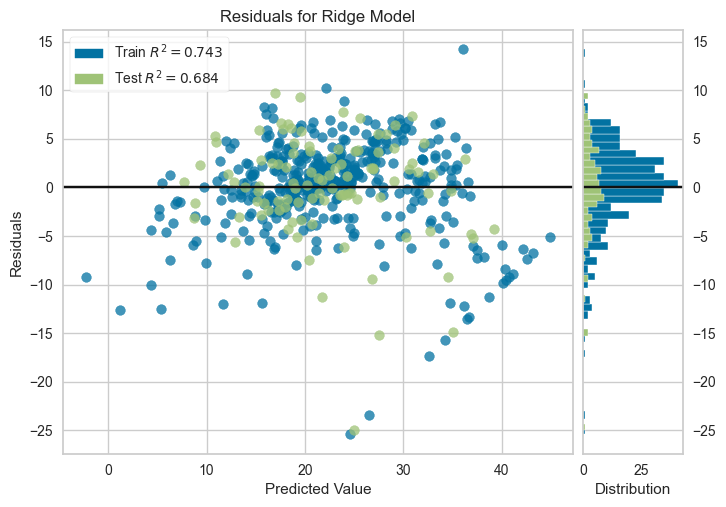

In [114]:
plot_model(tuned_ridge,plot='residuals')

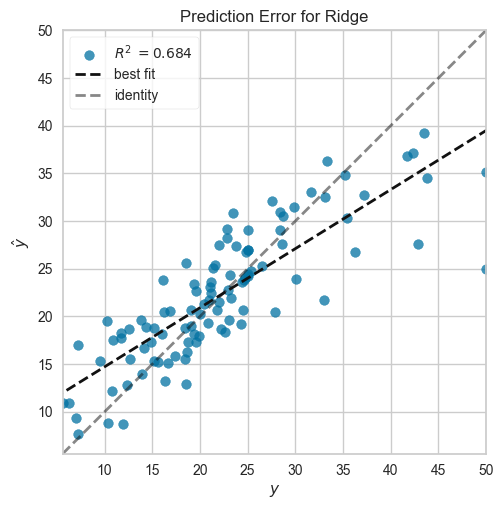

In [115]:
plot_model(tuned_ridge,plot='error' )

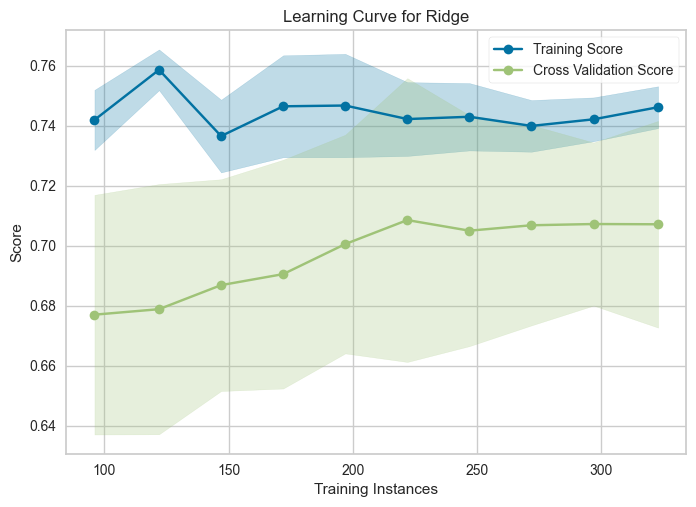

In [116]:
plot_model(tuned_ridge,plot='learning')

## Predict model

In [117]:
pycaret_predictions = predict_model(tuned_ridge)
pycaret_predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,3.6736,26.9518,5.1915,0.6841,0.2300,0.1950


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,price,prediction_label
404,-0.090420,-0.495391,1.011883,-0.293294,-0.203423,-0.734422,-1.022658,0.167064,1.708513,1.567998,0.823066,-0.316911,21.799999,20.713955
405,0.943351,-0.495391,1.011883,-0.293294,0.235714,-0.629553,-0.333968,-0.858785,1.708513,1.567998,0.823066,0.402500,10.200000,19.513193
406,-0.264299,-0.495391,-0.438700,-0.293294,-0.152753,-0.203086,0.802016,0.107780,-0.622195,-0.597561,1.185929,0.816127,15.200000,15.320889
407,-0.340166,0.367645,-1.046023,-0.293294,0.159710,1.653794,-0.586014,-0.431783,-0.505660,-0.856945,-2.442701,-1.307978,43.500000,39.201401
408,0.612799,-0.495391,1.011883,-0.293294,0.632627,-0.099615,1.096662,-1.263373,1.708513,1.567998,0.823066,-0.438405,50.000000,24.974392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.398224,1.877958,-1.296525,-0.293294,-1.411051,0.231771,-1.320853,1.734139,-0.971801,-0.639786,-1.399470,-0.615869,22.000000,27.477211
502,-0.378774,-0.495391,-0.617838,-0.293294,-0.912799,-0.700864,-1.271154,0.656427,-0.738731,-1.043943,-0.220166,0.192274,20.000000,20.222124
503,-0.052571,-0.495391,1.011883,-0.293294,0.835306,-0.738617,-0.742212,-0.336802,1.708513,1.567998,0.823066,0.189544,19.900000,17.930632
504,0.224615,-0.495391,1.011883,-0.293294,0.227270,-0.242237,0.379572,-0.102693,1.708513,1.567998,0.823066,0.305578,19.100000,19.032351


In [118]:
tuned_ridge.predict(X_test)

array([20.71395446, 19.51319384, 15.32088661, 39.201402  , 24.97439065,
       32.69696444,  9.34066343, 37.1348981 , 18.10191969, 17.31887625,
       34.84452616, 20.71314718, 29.06863311, 15.3630641 , 25.597019  ,
       24.00276957, 21.45715864, 15.56583762, 18.8745643 , 30.5434872 ,
       23.93775306, 16.25038301, 33.01490659, 18.75917198, 19.28082014,
       13.92902881, 20.53610011, 18.18368798, 22.6364133 , 12.90234835,
       35.10737618, 30.86350954, 19.57615761, 24.73179179, 17.55303595,
       25.39880761, 25.11609114, 34.53245779, 27.56634715, 15.15631638,
       21.34202109, 36.85371588,  7.71184049, 22.41161416, 22.7885092 ,
       28.24599029, 26.78955459, 16.65378021, 18.32575403, 24.31232004,
       23.58152742, 27.39323919, 15.53826678, 16.9666173 , 29.17969246,
       18.65664301, 23.03426129, 13.25509013, 17.30088221, 17.28015165,
       18.23744598, 25.28505412, 27.61792375, 10.94123373, 29.09863102,
       31.45798431, 21.89522826, 23.83336669, 26.94285099, 18.63

----

###  Additional links:
1. Underfitting vs Overfitting: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py
2. From Linear Regression to Ridge Regression, the Lasso, and the Elastic Net: https://towardsdatascience.com/from-linear-regression-to-ridge-regression-the-lasso-and-the-elastic-net-4eaecaf5f7e6
3. Standardizing features in Python:https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
4. sklearn Ridge: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
5. sklearn RidgeCV: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV
6. sklearn Lasso: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
7. skearn LassoCV: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV
8. sklearn Elasticnet: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
9. sklearn ElasticNetCV: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html#sklearn.linear_model.ElasticNetCV

